In [1]:
import os
import glob
import pandas as pd
import numpy as np

import sys
import pickle
import hdf5storage
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FixedFormatter, FixedLocator
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


df_sorted = pd.read_csv('../../../../raw_data/sheets/06-08-21-McGillData_WH_Exprodo-Report_IncExc_CR_CRmed_cham_CRtopfdemeduc_civetpass_slopes_ph5_11_time.age_sorted.csv')


In [2]:
#load in an lv, set behavs and components text once, will be same for all
lv_fname = 'lv_one.mat'
out_base = 'hbm_lv_one'
lv_ = hdf5storage.loadmat(lv_fname)
components_list = []
for idx in range(0,len(lv_['components'].tolist()[0])):
    components_list.append( str(lv_['components'].tolist()[0][idx][0]) )

    behavs_list = []
for idx in range(0,len(lv_['behavs_text'].tolist()[0])):
    behavs_list.append( str(lv_['behavs_text'].tolist()[0][idx][0]) )
    
    
mycolors = ['b','b','olivedrab','olivedrab','maroon','maroon','y','y',
           'darkviolet','darkviolet','c','c','g','g']

lv_one_err = np.concatenate( (lv_['lower'], lv_['upper']))

In [3]:
lv_one_err = np.concatenate( (lv_['lower'], lv_['upper']))
print(lv_['lower'])
print(lv_['upper'])
print(lv_one_err)

[[0.11744125 0.09669732 0.12063344 0.06951348 0.12491231 0.10717589
  0.0998947  0.11355253 0.09663744 0.10979997 0.10372898 0.11512874
  0.10380758 0.09293275]]
[[0.05677778 0.10231812 0.04734264 0.11002995 0.07825432 0.12310604
  0.03867821 0.05476685 0.03062907 0.0520525  0.05160953 0.06839792
  0.07800187 0.07765021]]
[[0.11744125 0.09669732 0.12063344 0.06951348 0.12491231 0.10717589
  0.0998947  0.11355253 0.09663744 0.10979997 0.10372898 0.11512874
  0.10380758 0.09293275]
 [0.05677778 0.10231812 0.04734264 0.11002995 0.07825432 0.12310604
  0.03867821 0.05476685 0.03062907 0.0520525  0.05160953 0.06839792
  0.07800187 0.07765021]]


In [4]:
#Update the behavs list text, in accordance with terms used in text
behavs_list_updated = behavs_list.copy()
#fluency
behavs_list_updated[0] = "LexicalFlu_baseline"; behavs_list_updated[1] = "LexicalFlu_decline"
behavs_list_updated[2] = "SemanticFlu_baseline"; behavs_list_updated[3] = "SemanticFlu_decline"
#memory
behavs_list_updated[4] = "Memory_baseline"; behavs_list_updated[5] = "Memory_decline"
#ah4 reasoning
behavs_list_updated[6] = "InductiveReasoning_baseline"; behavs_list_updated[7] = "InductiveReasoning_decline"
behavs_list_updated[8] = "VerbalReasoning_baseline"; behavs_list_updated[9] = "VerbalReasoning_decline"
behavs_list_updated[10] = "MathematicalReasoning_baseline"; behavs_list_updated[11] = "MathematicalReasoning_decline"
behavs_list_updated[12] = "Vocabulary_baseline"; behavs_list_updated[13] = "Vocabulary_decline"
behavs_list_updated

['LexicalFlu_baseline',
 'LexicalFlu_decline',
 'SemanticFlu_baseline',
 'SemanticFlu_decline',
 'Memory_baseline',
 'Memory_decline',
 'InductiveReasoning_baseline',
 'InductiveReasoning_decline',
 'VerbalReasoning_baseline',
 'VerbalReasoning_decline',
 'MathematicalReasoning_baseline',
 'MathematicalReasoning_decline',
 'Vocabulary_baseline',
 'Vocabulary_decline']

In [5]:
df_demo_pls = pd.read_csv('demo_nmfk10_pls_int-slope.csv')
groups = df_demo_pls.groupby('LV_Group')
df_demo_pls

,oxmg_id,bet_qc..0.5.fair..0.bad..blank..good.,Motion_qc,T1_comments_SS,General_comments,FinalVerdict_SSProject_Include.Exclude,SS_IncExc,motion_status_rai,final_status_SS_RP,OX.MRI,...,usc_LV_6,usc_LV_7,usc_LV_8,usc_LV_9,usc_LV_10,usc_LV_11,usc_LV_12,usc_LV_13,usc_LV_14,LV_Group
0,1191,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.257626,-1.652116,0.404904,0.580059,0.179608,0.163676,0.649952,-0.414800,-0.091203,B
1,1181,NaN,NaN,NaN,NaN,NaN,Include,exclude,exclude,Yes,...,1.755285,0.616611,-5.549115,0.961931,-3.516745,-3.636347,-1.443568,3.226716,-0.171466,C
2,1066,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,2.378378,-2.034679,1.015498,1.850364,-0.835814,-0.143767,0.330586,1.466283,-0.603875,B
3,1407,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,2.168222,0.180446,-0.770654,0.798770,-1.044776,-1.311053,-0.709046,0.611861,0.584004,D
4,1300,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.229837,1.094601,0.204914,0.790274,1.104086,0.634335,-0.455929,0.793495,0.800460,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1124,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.599322,-1.126252,-1.079458,0.360654,-0.679455,3.993460,-1.431918,-1.201483,-2.593634,A
394,2888,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.667794,0.255365,1.552478,-0.034581,-1.453453,-2.146689,-0.587543,0.700108,-1.523136,D
395,1502,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-1.149727,2.580876,-0.783884,0.582461,1.550423,2.650692,1.667946,-0.328216,-2.096044,A
396,1224,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.009774,3.846126,-4.324034,0.717174,-2.044026,-0.019272,-0.393498,0.940771,-0.053409,C


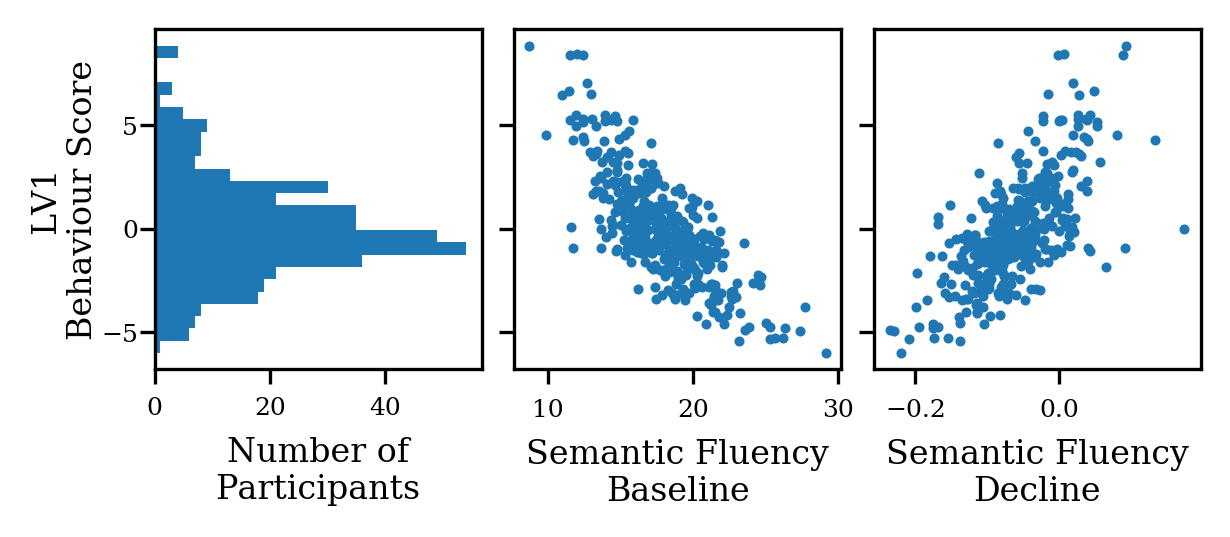

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (4.5,1.5), dpi=300, sharey=True)
plt.subplots_adjust(wspace = 0.1)
ax1.hist(df_demo_pls['vsc_LV_1'].values.flatten(),bins=25, orientation='horizontal')
ax1.set_ylabel('LV1\nBehaviour Score', fontsize=8, labelpad=0.5)
ax1.set_xlabel('Number of\nParticipants', fontsize=8)
ax1.tick_params(axis='both', labelsize=6, pad=0.5)
ax1.tick_params(axis='x', which='major',pad=3)
#plt.title('Histogram of LV1 Behaviour Scores')
#plt.savefig("lv1_behavscore_hist.png",bbox_inches='tight', dpi = 'figure')
#plt.show()
      
x=df_demo_pls['vsc_LV_1'].values.flatten()
y=df_demo_pls['intercept_animals'].values.flatten()
ax2.scatter(y,x,s=2)
ax2.tick_params(axis='both', labelsize=6)
#ax2.tick_params(axis='y', pad=10)
#ax2.set_xlabel('LV1 Behaviour Score',fontsize=8)
ax2.set_xlabel('Semantic Fluency\nBaseline',fontsize=8)
#plt.savefig("lv1_behavscore_vs_semint.png",bbox_inches='tight', dpi = 'figure')
      
x=df_demo_pls['vsc_LV_1'].values.flatten()
y=df_demo_pls['time_since_ph5_animals'].values.flatten()
ax3.scatter(y,x,s=2)
ax3.tick_params(axis='both', labelsize=6)
#ax3.set_xlabel('LV1 Behaviour Score',fontsize=8)
ax3.set_xlabel('Semantic Fluency\nDecline',fontsize=8)
plt.savefig("subplot_lv1hist_lv1_vs_cog_flat.png",bbox_inches='tight', dpi = 'figure')
plt.show()

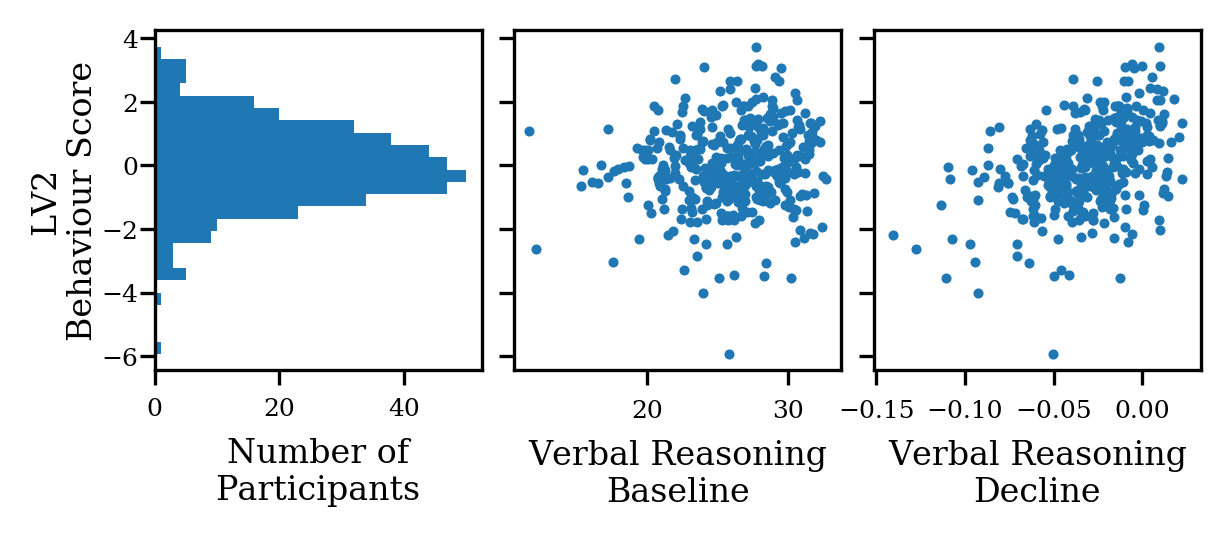

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (4.5, 1.5), dpi=300, sharey=True)
plt.subplots_adjust(wspace = 0.1)
ax1.hist(df_demo_pls['vsc_LV_2'].values.flatten(),bins=25, orientation='horizontal')
ax1.set_ylabel('LV2\nBehaviour Score', fontsize=8, labelpad=0.5)
ax1.set_xlabel('Number of\nParticipants', fontsize=8)
ax1.tick_params(axis='both', labelsize=6, pad=0.5)
ax1.tick_params(axis='x', which='major',pad=3)
#ax1.tick_params(axis='y', which='major', pad=3)
#plt.title('Histogram of LV1 Behaviour Scores')
#plt.savefig("lv1_behavscore_hist.png",bbox_inches='tight', dpi = 'figure')
#plt.show()
      
x=df_demo_pls['vsc_LV_2'].values.flatten()
y=df_demo_pls['intercept_ahverb'].values.flatten()
ax2.scatter(y,x,s=2)
ax2.tick_params(axis='both', labelsize=6)
#ax2.tick_params(axis='y', pad=10)
#ax2.set_xlabel('LV1 Behaviour Score',fontsize=8)
ax2.set_xlabel('Verbal Reasoning\nBaseline',fontsize=8)
#plt.savefig("lv1_behavscore_vs_semint.png",bbox_inches='tight', dpi = 'figure')
      
x=df_demo_pls['vsc_LV_2'].values.flatten()
y=df_demo_pls['time_since_ph5_ahverb'].values.flatten()
ax3.scatter(y,x,s=2)
ax3.tick_params(axis='both', labelsize=6)
#ax3.set_xlabel('LV1 Behaviour Score',fontsize=8)
ax3.set_xlabel('Verbal Reasoning\nDecline',fontsize=8)
plt.savefig("subplot_lv2hist_lv2_vs_cog_flat.png",bbox_inches='tight', dpi = 'figure')
plt.show()